In [1]:
'''import packages'''

import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import numpy as np
import skimage
import matplotlib.image as mpimg
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import csv
import pandas as pd
import mediapipe as mp
from skimage.feature import hog

In [25]:
"hog for feature extraction"
hog_faces = []
target = []
dir = os.getcwd()
for folder in os.listdir(dir + '\\testdata\\test' ):
    print(folder)
    i = 0
    for face in os.listdir(+dir + '\\testdata\\test\\' + folder):
        i +=1
        image = cv2.imread( dir + '\\testdata\\test\\' + folder + "\\" + face)
        
        img = cv2.resize(image,(300,400))
        
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block = (2, 2), visualize=True, multichannel=True)
        hog_faces.append(hog_image)
        
    print(str(i)+" Faces")
print("Done processing...")

#import labels for faces
for file in os.listdir(dir + 'testdata\testlabel'):
    file = open(dir + 'testdata\testlabel\\' + file,"r")
    t = [list(map(int,rec)) for rec in csv.reader(file, delimiter=',')]
   
    target += t[0]
    file.close()
    
print("targets leangth: " + str(len(target)))

Facialispares 0 - Andrei - 1


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


C:\Users\oskar\AppData\Local\Temp\ipykernel_19128\1148371368.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=20, pixels_per_cell=(4, 4),


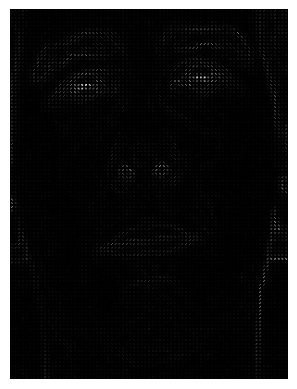

In [24]:
img = cv2.imread('faces\Facialispares 3 - Oskar - 1\Facialispares 3 - Oskar - 1frame1.jpg')
resized_img = cv2.resize(img, (300, 400))
fd, hog_image = hog(resized_img, orientations=20, pixels_per_cell=(4, 4),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [ ]:
'''create a dataframe'''
face_data = []

for face in faces:
    f = face.ravel()
    face_data.append(f)
    
print(len(face_data))

df = { 'faces': faces,
      'target':target,
      'data': face_data 
}

df = pd.DataFrame(df) 
print(str(len(faces)) + " Faces in dataframe")
print(str(len(face_data[0])) + " Features in a face")

In [ ]:

"create a training and test set"

h,w = df.faces[0].shape
n_samples, n_labels = df.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = df.data.values.tolist()
y = df.target
n_features = len(X[1])
labels =["No stroke","Stroke"]
n_classes = len(labels)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X[:2000], y[:2000], test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
"NN model for classification"
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
"Fit model to data"

model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])